# Priority Queues and Heaps

[Click here to run this chapter on Colab](https://colab.research.google.com/github/AllenDowney/DSIRP/blob/main/notebooks/heap.ipynb)

## The `heapq` module

The `heapq` module provides functions for adding and removing elements to and from a heap.



In [6]:
from heapq import heappush, heappop

The heap itself is literally a list, so if you create an empty list, you can think of it as a heap with no elements.

In [7]:
heap = []

Then you can use `heappush` to add one element at a time.

In [8]:
data = [4, 9, 3, 7, 5, 1, 6, 8, 2]

for x in data:
    heappush(heap, x)
    
heap

[1, 2, 3, 5, 7, 4, 6, 9, 8]

The result is a list that represents a tree.
Here's how the correspondence works between the list representation and the tree representation:

* The first element (index 0) is the root.

* The next two elements are the children of the root.

* The next four element are the grandchildren of the root.

And so on.

In general, if the index of an element is `i`, its parent is `(i-1)//2` and its children are `2*i + 1` and `2*i + 2`.

## Drawing the Tree

To generate the tree representation of the heap, the following function iterates through the heap and makes a NetworkX graph with an edge between each node and its parent.

In [9]:
import networkx as nx

def make_dag(heap):
    """Make a NetworkX graph that represents the heap."""
    G = nx.DiGraph()
    
    for i in range(1, len(heap)):
        parent = (i-1)//2
        G.add_edge(parent, i)
    
    return G

In [10]:
G = make_dag(heap)

To draw the tree, we'll use a module called `EoN` that provides a function called [hierarchy_pos](https://epidemicsonnetworks.readthedocs.io/en/latest/functions/EoN.hierarchy_pos.html#EoN.hierarchy_pos).

It takes as a parameter a NetworkX graph that represents a tree, and it returns a dictionary that maps from each node to a position in the Cartesian plane.
If we pass this dictionary to `nx.draw`, it lays the tree out accordingly.

In [9]:
try:
    import EoN
except ImportError:
    !pip install EoN

In [11]:
from EoN import hierarchy_pos

def draw_heap(heap):
    G = make_dag(heap)
    pos = hierarchy_pos(G)
    labels = dict(enumerate(heap))
    nx.draw(G, pos, labels=labels, alpha=0.4)

Here's what the tree representation looks like.

[1, 2, 3, 5, 7, 6, 4, 8, 9]


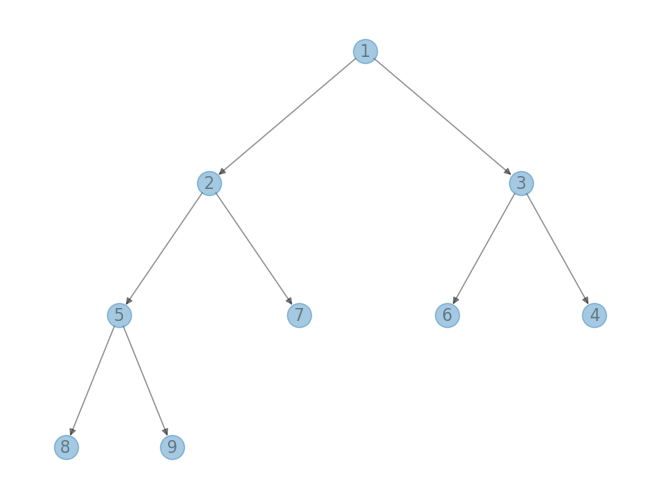

In [16]:
import networkx as nx
from EoN import hierarchy_pos



class PQ:
    

    """
    >>> pq = new()
    >>> pq.size()
    0
    """

    def __init__(self):
        self.data = []

    def __eq__(self, other):
        return self.data == other.data

    def size(self):
        return len(self.data)


def new():

    """
    >>> pq = new()
    >>> isinstance(pq, PQ)
    True
    >>> pq.size()
    0
    """


    return PQ()

def insert(pq, value, Append = True):
   
    '''
    >>> pq = new()
    >>> insert(pq, 7)
    [7]
    >>> pq.size()
    1
    >>> insert(pq, 6)
    [6, 7]
    >>> pq.size()
    2

    '''
    storage = 0
    
    if Append:
        pq.data.append(value)
    
    valueI = pq.data.index(value)
    parent = pq.data[(pq.data.index(value)-1)//2]
    parentI = (pq.data.index(value)-1)//2
    
    if pq.data.index(value) == 0:
        return pq.data
    
    elif value <= parent:
        
        pq.data[parentI], pq.data[valueI] =  pq.data[valueI], pq.data[parentI]
        
        insert(pq, value, False)
    
    return pq.data


def dm(pq, value = -1, Assign = True):
    
    '''
    >>> pq = new()
    >>> insert(pq, 7)
    [7]
    >>> pq.size()
    1
    >>> insert(pq, 6)
    [6, 7]
    >>> insert(pq, 3)
    [3, 7, 6]
    >>> pq.size()
    3
    >>> dm(pq)
    [6, 7]

    '''

    if value == -1:
        value = pq.data[len(pq.data)-1]
    
    if Assign:
        pq.data[0] = value
        pq.data.pop()

    leftParent = (pq.data.index(value)*2)+1
    rightParent = (pq.data.index(value)*2)+2
    

    if (leftParent) < len(pq.data):
        p1 = pq.data[(pq.data.index(value)*2)+1]
        p1Index = (pq.data.index(value)*2)+1
    if (rightParent) < len(pq.data):
        p2 = pq.data[(pq.data.index(value)*2)+2]
        p2Index = (pq.data.index(value)*2)+2
    else:
        return pq.data
    
    left = p1<p2

    if value <= p1 and left:
        return pq.data
    elif left and (p1Index) < len(pq.data) :
            pq.data[p1Index], pq.data[pq.data.index(value)] = pq.data[pq.data.index(value)], pq.data[p1Index]
            dm(pq, value, False)
    elif not left and (p2Index) < len(pq.data):
        pq.data[p2Index], pq.data[pq.data.index(value)] = pq.data[pq.data.index(value)], pq.data[p2Index]
        dm(pq, value, False)
    else:
        return pq.data

def fm(pq):
    
    '''
    >>> pq = new()
    >>> insert(pq, 7)
    [7]
    >>> pq.size()
    1
    >>> insert(pq, 6)
    [6, 7]
    >>> insert(pq, 3)
    [3, 7, 6]
    >>> pq.size()
    3
    >>> dm(pq)
    [6, 7]
    >>> insert(pq, 3)
    [3, 7, 6]
    >>> fm(pq)
    3
    '''
    return pq.data[0]
    

def heapSort(list):
    for item in list:
        insert(pq, item)
    print(pq.data)
        
    

def make_dag(heap):
    """Make a NetworkX graph that represents the heap."""
    G = nx.DiGraph()
    
    for i in range(1, len(heap)):
        parent = (i-1)//2
        G.add_edge(parent, i)
    
    return G


def draw_heap(heap):
    G = make_dag(heap)
    pos = hierarchy_pos(G)
    labels = dict(enumerate(heap))
    nx.draw(G, pos, labels=labels, alpha=0.4)


list = [2, 5, 6, 8, 7, 4, 3, 1, 9]
pq = new()
heapSort(list)
draw_heap(pq.data)



if __name__ == "__main__":
    import doctest
    doctest.testmod()

## The Heap Property

If the list is a heap, the tree should have the heap property: 

> Every parent is less than or equal to its children.

Or more formally:

> For all pairs of nodes P and C, where P is the parent of C, the value of P must be less than or equal to the value of C.

The following function checks whether this property is true for all nodes.

In [9]:
def is_heap(heap):
    """Check if a sequence has the heap property.
    
    Every child should be >= its parent.
    """
    for i in range(1, len(heap)):
        parent = (i-1) // 2
        if heap[parent] > heap[i]:
            return False
    return True

As we might hope, `heap` is a heap.

In [10]:
is_heap(heap)

True

Here's a list of integers in no particular order, and as you might expect, it does not have the heap property.

In [11]:
data = [4, 9, 3, 7, 5, 1, 6, 8, 2]
is_heap(data)

False

## Using a Heap to Sort

Given a heap, we can implement a sort algorithm called [heapsort](https://en.wikipedia.org/wiki/Heapsort). 

Let's start again with a fresh heap:

In [12]:
heap = []
for x in data:
    heappush(heap, x)

If we know that a list is a heap, we can use `heappop` to find and remove the smallest element.

In [13]:
heappop(heap)

1

`heappop` rearranges the remaining elements of the list to restore the heap property (we'll see how soon). 

In [14]:
heap

[2, 5, 3, 8, 7, 4, 6, 9]

In [15]:
is_heap(heap)

True

And that means we can use `heappop` again to get the second smallest element (of the original heap):

In [16]:
heappop(heap)

2

Which means we can use a heap to sort a list.

**Exercise:** Write a generator function called `heapsort` that takes an iterable and yields the elements of the iterable in increasing order. 

In [17]:

list = [1, 3, 20, 7, 9, 5, 4, 6, 8]
def sorter(list):
    heap = []
    sorted = []
    for x in list:
        heappush(heap, x)
    for y in range(len(list)):
        sorted.append(heappop(heap))
    return sorted
    



In [18]:
sorter(list)

[1, 3, 4, 5, 6, 7, 8, 9, 20]

Now let's see how a heap is implemented.
The two key methods are `push` and `pop`.

## Push

To insert an element in a heap, you start by appending it to the list.

The result is generally not a heap, so you have to do some work to restore the heap property:

* If the new element is greater than or equal to its parent, you are done.

* Otherwise swap the new element with its parent.

* If the new element is greater than or equal to the parent's parent, you are done.

* Otherwise swap the new element with its parent's parent.

* And repeat, working your way up the tree, until you're done or you reach the root.

This process is called "sift-up" or sometimes [swim](https://en.wikipedia.org/wiki/Heap_(data_structure)#Implementation).

**Exercise:** Write a function called `push` that does the same thing as `heappush`: it should take as parameters a list (which should be a heap) and a new element; it should add the new element to the list and restore the heap property.

In [19]:
heap = [2, 5, 6, 7, 8 , 9, 10, 11]

def push(heap, value, Append):

    storage = 0
    
    
    if Append:
        print("before adding value ", heap)
        heap.append(value)
        print("after adding value: ", heap)
    
    valueI = heap.index(value)
    parent = heap[(heap.index(value)-1)//2]
    parentI = (heap.index(value)-1)//2
    
    print("value: ", value)
    print("parent: ", parent)
    if heap.index(value) == 0:
        return heap
    
    elif value <= parent:
        
        heap[parentI], heap[valueI] =  heap[valueI], heap[parentI]
        
        print("after swap: ", heap)
        push(heap, value, False)
    
    return 'Sorted Heap: ', heap
        
    
    
print(push(heap, 3, True))
is_heap(heap)

before adding value  [2, 5, 6, 7, 8, 9, 10, 11]
after adding value:  [2, 5, 6, 7, 8, 9, 10, 11, 3]
value:  3
parent:  7
after swap:  [2, 5, 6, 3, 8, 9, 10, 11, 7]
value:  3
parent:  5
after swap:  [2, 3, 6, 5, 8, 9, 10, 11, 7]
value:  3
parent:  2
('Sorted Heap: ', [2, 3, 6, 5, 8, 9, 10, 11, 7])


True

In [20]:
heap = [3, 5, 6, 7, 8 , 9, 10, 11]

def push(heap, value):

    storage = 0
    
    print("before adding value ", heap)
    
    heap.append(value)
    valueI = heap.index(value)
    parent = heap[(heap.index(value)-1)//2]
    
    print("after adding value: ", heap)
    print("value: ", value)
    print("parent: ", parent)
    
    if value <= parent:
        storage = parent
        
        heap[(heap.index(value)-1)//2] = value
        
        heap[valueI] = storage
        
        print("after swap: ", heap)

        push1(heap, value)
        
    else:
        return heap
    

def push1(heap, value):
    
    storage = 0
    valueI = heap.index(value)
    parent = heap[(heap.index(value)-1)//2]
    
    
    print("value: ", value)
    print("parent: ", parent)
    if heap.index(value) == 0:
        return heap
    elif value <= parent:
        storage = parent
        
        heap[(heap.index(value)-1)//2] = value
        
        heap[valueI] = storage
        
        print("after swap: ", heap)

        push1(heap, value)
        
    else:
        return heap
    
    



push(heap, 2)
    


before adding value  [3, 5, 6, 7, 8, 9, 10, 11]
after adding value:  [3, 5, 6, 7, 8, 9, 10, 11, 2]
value:  2
parent:  7
after swap:  [3, 5, 6, 2, 8, 9, 10, 11, 7]
value:  2
parent:  5
after swap:  [3, 2, 6, 5, 8, 9, 10, 11, 7]
value:  2
parent:  3
after swap:  [2, 3, 6, 5, 8, 9, 10, 11, 7]
value:  2
parent:  7


You can use this example to test your code:

In [21]:

for x in data:
    push(heap, x)
    assert is_heap(heap)

heap

before adding value  [2, 3, 6, 5, 8, 9, 10, 11, 7]
after adding value:  [2, 3, 6, 5, 8, 9, 10, 11, 7, 4]
value:  4
parent:  8
after swap:  [2, 3, 6, 5, 4, 9, 10, 11, 7, 8]
value:  4
parent:  3
before adding value  [2, 3, 6, 5, 4, 9, 10, 11, 7, 8]
after adding value:  [2, 3, 6, 5, 4, 9, 10, 11, 7, 8, 9]
value:  9
parent:  6
before adding value  [2, 3, 6, 5, 4, 9, 10, 11, 7, 8, 9]
after adding value:  [2, 3, 6, 5, 4, 9, 10, 11, 7, 8, 9, 3]
value:  3
parent:  2


AssertionError: 

In [ ]:
is_heap(heap)

False

## Pop

To remove an element from the heap, you:

* Make a copy of the root element,

* Pop the *last* element off the list and store it at the root.

* Then you have to restore the heap property. If the new root is less than or equal to both of its children, you are done.

* Otherwise, swap the parent with the smaller of its children.

* Then repeat the process with the child you just replaced, and continue until you get to a leaf node.

This process is called a "sift-down" or sometimes "sink".

**Exercise:** Write a function called `pop` that does the same thing as `heappop`: it should remove the smallest element, restore the heap property, and return the smallest element.

Hint: This one is tricky because you have to deal with several special cases.

In [14]:
##2*i + 2
##2*i + 1
heap = [3, 5, 6, 7, 8 , 9, 10, 11]


def pop(heap, value=-1, Assign=True):
    if value == -1:
        value = heap[len(heap)-1]
        
    if Assign:
        print("heap: ", heap)
        print("value: ", value)
        heap[0] = value
        print("heap after setting first to value: ", heap)
        heap.pop()
    leftParent = (heap.index(value)*2)+1
    rightParent = (heap.index(value)*2)+2
    print("heap: ", heap)
    print("value index: ",heap.index(value))
    if (rightParent) < len(heap):
        p2 = heap[(heap.index(value)*2)+2]
        p2Index = rightParent
        p1 = heap[(heap.index(value)*2)+1]
        p1Index = leftParent
    else:
        return heap
    print("left parent", p1)
    print("right parent", p2)
    print("Swap Left?", p1<p2)
    left = p1<p2
    print()
    if value <= p1 and left:
        return heap
    elif left and (p1Index) < len(heap) :
            heap[p1Index], heap[heap.index(value)] = heap[heap.index(value)], heap[p1Index]
            pop(heap, value, False)
    elif not left and (p2Index) < len(heap):
        heap[p2Index], heap[heap.index(value)] = heap[heap.index(value)], heap[p2Index]
        pop(heap, value, False)
    else:
        return heap


    
pop(heap)


heap:  [3, 5, 6, 7, 8, 9, 10, 11]
value:  11
heap after setting first to value:  [11, 5, 6, 7, 8, 9, 10, 11]
heap:  [11, 5, 6, 7, 8, 9, 10]
value index:  0
left parent 5
right parent 6
Swap Left? True

heap:  [5, 11, 6, 7, 8, 9, 10]
value index:  1
left parent 7
right parent 8
Swap Left? True

heap:  [5, 7, 6, 11, 8, 9, 10]
value index:  3


In [ ]:
heap = []
for x in data:
    heappush(heap, x)

while heap:
    print(pop(heap))
    assert is_heap(heap)

In [3]:
heap = [1, 4, 2, 5, 8, 9, 3, 7, 6]



In [ ]:
def pop(heap, value, Assign):
    if Assign:
        print("heap: ", heap)
        print("value: ", value)
        heap[0] = value
        print("heap after setting first to value: ", heap)
        heap.pop()
    leftParent = (heap.index(value)*2)+1
    rightParent = (heap.index(value)*2)+2
    print("heap: ", heap)
    print("value index: ",heap.index(value))
    if (rightParent) < len(heap):
        p2 = heap[(heap.index(value)*2)+2]
        p2Index = rightParent
        p1 = heap[(heap.index(value)*2)+1]
        p1Index = leftParent
    else:
        return heap
    print("left parent", p1)
    print("right parent", p2)
    print("Swap Left?", p1<p2)
    left = p1<p2
    print()
    if value <= p1 and left:
        return heap
    elif left and (p1Index) < len(heap) :
            heap[p1Index], heap[heap.index(value)] = heap[heap.index(value)], heap[p1Index]
            pop(heap, value, False)
    elif not left and (p2Index) < len(heap):
        heap[p2Index], heap[heap.index(value)] = heap[heap.index(value)], heap[p2Index]
        pop(heap, value, False)
    else:
        return heap


*Data Structures and Information Retrieval in Python*

Copyright 2021 Allen Downey

License: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/)